<a href="https://colab.research.google.com/github/developer-john67/Gaming_app/blob/main/NLP-practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk

In [2]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [3]:
import numpy as np
import pandas as pd


In [4]:
df= pd.read_csv('https://raw.githubusercontent.com/futurexskill/ml-model-deployment/main/Restaurant_Reviews.tsv.txt', delimiter= '\t', quoting = 3)

In [5]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [9]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

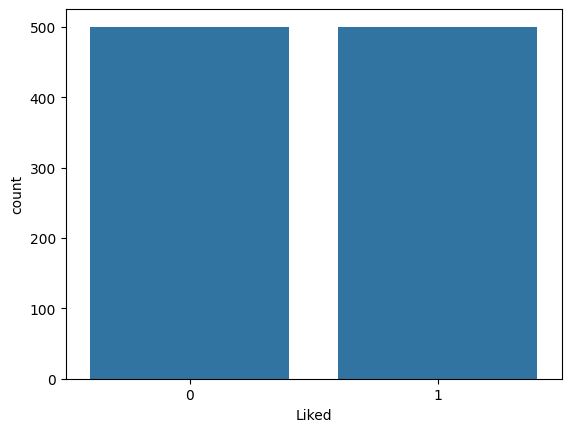

In [15]:
sns.countplot(x= 'Liked', data= df)
plt.show()

In [16]:
import re

In [17]:
from nltk import PorterStemmer
from nltk.corpus import stopwords

In [18]:
ps= PorterStemmer()

In [25]:
corpus= []
for i in range (0, 1000):
  customer_review= re.sub('[^a-zA-Z]',' ', df['Review'][i])
  customer_review= customer_review.lower()
  customer_review= customer_review.split()
  clean_review= (ps.stem(word) for word in customer_review if not word in set(stopwords.words('english')))
  clean_review= ' '.join(clean_review)
  corpus.append(clean_review)

In [24]:
print(type(corpus))

<class 'list'>


In [26]:
corpus[12]

'cashier care ever say still end wayyy overpr'

In [27]:
corpus[0]

'wow love place'

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer(max_features= 1500, min_df= 3, max_df= 0.6)

In [30]:
X= vectorizer.fit_transform(corpus).toarray()

In [31]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [35]:
y= df.iloc[:, 1].values

In [36]:
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 42)

In [47]:
import torch
import torch.optim as optim
import torch.nn as nn
from torch.nn import functional as F

In [48]:
Xtrain_= X_train.float()
Xtest_= X_test.float()

In [49]:
ytrain_= torch.from_numpy(y_train)
ytest_= torch.from_numpy(y_test)

In [50]:
Xtrain_.shape, ytrain_.shape

(torch.Size([800, 467]), torch.Size([800]))

In [52]:
Xtest_.shape, ytest_.shape

(torch.Size([200, 467]), torch.Size([200]))

In [53]:
input_size=467
output_size=2
hidden_size=500

In [56]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1= torch.nn.Linear(input_size, hidden_size)
    self.fc2= torch.nn.Linear(hidden_size, hidden_size)
    self.fc3= torch.nn.Linear(hidden_size, output_size)
  def forward(self, x):
    x= torch.relu(self.fc1(x))
    x= torch.relu(self.fc2(x))
    x= self.fc3(x)
    return F.log_softmax(x, dim= 1)

In [57]:
model= Net()

In [67]:
optimizer= torch.optim.Adam(model.parameters(), lr= 0.01)
loss_fn= nn.NLLLoss()

In [68]:
epochs= 100

In [69]:
for epoch in range(epochs):
  optimizer.zero_grad()
  ypred= model(Xtrain_)
  loss= loss_fn(ypred, ytrain_)
  loss.backward()
  optimizer.step()
  print('Epoch', epoch, 'loss', loss.item())

Epoch 0 loss 0.01897571235895157
Epoch 1 loss 0.09431459754705429
Epoch 2 loss 0.024929584935307503
Epoch 3 loss 0.026376262307167053
Epoch 4 loss 0.028436221182346344
Epoch 5 loss 0.026257043704390526
Epoch 6 loss 0.02421862818300724
Epoch 7 loss 0.022035248577594757
Epoch 8 loss 0.02118634432554245
Epoch 9 loss 0.02143925242125988
Epoch 10 loss 0.020714811980724335
Epoch 11 loss 0.019931241869926453
Epoch 12 loss 0.019498487934470177
Epoch 13 loss 0.01932697743177414
Epoch 14 loss 0.01930723525583744
Epoch 15 loss 0.01927884854376316
Epoch 16 loss 0.01921938918530941
Epoch 17 loss 0.01916966214776039
Epoch 18 loss 0.01908152736723423
Epoch 19 loss 0.019025739282369614
Epoch 20 loss 0.01906048133969307
Epoch 21 loss 0.019097236916422844
Epoch 22 loss 0.01907210238277912
Epoch 23 loss 0.01901119388639927
Epoch 24 loss 0.018987415358424187
Epoch 25 loss 0.019006218761205673
Epoch 26 loss 0.01901669055223465
Epoch 27 loss 0.019006459042429924
Epoch 28 loss 0.018990488722920418
Epoch 29 l

In [70]:
sample = ["Good batting by England"]


In [71]:
sample = vectorizer.transform(sample).toarray()


In [72]:
sample

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [73]:
torch.from_numpy(sample).float()

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.,

In [74]:
sentiment = model(torch.from_numpy(sample).float())
sentiment


tensor([[-1.1006, -0.4045]], grad_fn=<LogSoftmaxBackward0>)

In [75]:
sample2 = ["bad performance by India in the match"]

In [76]:
sample2 = vectorizer.transform(sample2).toarray()


In [77]:
sentiment2 = model(torch.from_numpy(sample2).float())
sentiment2

tensor([[  0.0000, -30.1357]], grad_fn=<LogSoftmaxBackward0>)

In [78]:
model.state_dict()

OrderedDict([('fc1.weight',
              tensor([[ 0.0589,  0.0423, -0.0321,  ..., -0.0029,  0.0840,  0.2080],
                      [ 0.1140,  0.0314,  0.1418,  ..., -0.0462,  0.0452, -0.1347],
                      [ 0.0694,  0.0059,  0.1361,  ..., -0.0841,  0.0932, -0.1137],
                      ...,
                      [-0.0187,  0.0540, -0.0359,  ...,  0.0423,  0.0159,  0.0411],
                      [-0.0186,  0.0492,  0.0447,  ..., -0.0065, -0.1433, -0.0520],
                      [ 0.1272,  0.0665,  0.0948,  ...,  0.1060,  0.0661,  0.2140]])),
             ('fc1.bias',
              tensor([ 4.5164e-02, -2.2066e-02, -3.6680e-02, -4.9540e-02, -9.4778e-02,
                      -6.2344e-02, -2.9930e-02, -8.3484e-02,  4.6847e-02,  8.6610e-03,
                       7.6172e-02, -4.6041e-02, -5.5573e-02, -3.5723e-02, -5.3950e-02,
                      -3.0232e-02, -6.9785e-02,  6.2646e-02, -1.0783e-01, -3.9931e-03,
                      -4.3449e-02, -7.0220e-02, -1.8580e-02,  5.

In [79]:
torch.save(model.state_dict(),'text_classifier_pytorch')

In [80]:
!ls

sample_data  text_classifier_pytorch


In [81]:
from google.colab import files


In [82]:
files.download('text_classifier_pytorch')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [83]:
import pickle

In [84]:
with open('vectorizer.pickle', 'wb') as file:
  pickle.dump(vectorizer, file)

In [85]:
files.download('vectorizer.pickle')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>